In [1]:
import numpy as np
import gc
from sklearn import preprocessing 
import pandas as pd
import matplotlib.pyplot as plt
import hdbscan
import seaborn as sns
from pathlib import Path
from scipy.spatial import distance_matrix

In [2]:
def read_bl2(path):
    return np.core.records.fromfile(str(path),formats='f8,(2048)i2,f8,(2048)i2',names='tstamp,pwave,ptime,wave')

In [3]:
saturatedData = np.array(np.arange(2048))
# List all files in directory using pathlib
basepath = Path("/Users/elicarter/Local/FominResearch/RealData/Runs/s_1000")
files_in_basepath = (entry for entry in basepath.iterdir() if entry.is_file())
for item in files_in_basepath:
    if str(item).endswith(".dat"):
        print("Adding " + str(item))
        saturatedData = np.vstack((saturatedData, read_bl2(item)["wave"]))
saturatedData = np.delete(saturatedData, [0], 0) #delete the placeholder shape row

Adding /Users/elicarter/Local/FominResearch/RealData/Runs/s_1000/s_1000_r_000010_1.dat
Adding /Users/elicarter/Local/FominResearch/RealData/Runs/s_1000/s_1000_r_000050_1.dat
Adding /Users/elicarter/Local/FominResearch/RealData/Runs/s_1000/s_1000_r_000090_1.dat
Adding /Users/elicarter/Local/FominResearch/RealData/Runs/s_1000/s_1000_r_000070_1.dat
Adding /Users/elicarter/Local/FominResearch/RealData/Runs/s_1000/s_1000_r_000020_1.dat
Adding /Users/elicarter/Local/FominResearch/RealData/Runs/s_1000/s_1000_r_000001_1.dat


In [4]:
#delete all data that goes over 30,000 as it's pre amp saturated
data = np.copy(saturatedData)
over30k = False
#iterate backwards to avoid index proboems with removing
for i in range(len(saturatedData)-1,-1,-1):
    for j in range(len(saturatedData[0])-1,-1,-1):
        if (saturatedData[i,j] > 30000):
            data = np.delete(data, i, axis=0)
            break

In [5]:
data = data.astype(float)

In [6]:
#baseline shift data
for i in range(len(data)):
    avgShift = 0
    avgShift = np.average(data[i][0:400])
    print('Shifted by ' + str(avgShift) + " ")
    data[i] = data[i] - avgShift 

Originally [ 1568.   848. -1344. ...   320.  1744.   480.] Shifted by -167.88 Now [ 1735.88  1015.88 -1176.12 ...   487.88  1911.88   647.88] 
Originally [-2176.   192. -3472. ... -1504.  -528. -1680.] Shifted by 135.12 Now [-2311.12    56.88 -3607.12 ... -1639.12  -663.12 -1815.12] 
Originally [  560. -2368. -3728. ...   752.  1760. -1296.] Shifted by -675.6 Now [ 1235.6 -1692.4 -3052.4 ...  1427.6  2435.6  -620.4] 
Originally [ 2496. -1392.  -704. ... -2032. -1616. -1920.] Shifted by -525.92 Now [ 3021.92  -866.08  -178.08 ... -1506.08 -1090.08 -1394.08] 
Originally [-2032. -1264. -1328. ...   688.  -112.   704.] Shifted by -507.16 Now [-1524.84  -756.84  -820.84 ...  1195.16   395.16  1211.16] 
Originally [  -48. -1952. -3024. ...   272.  -864.  1472.] Shifted by -114.12 Now [   66.12 -1837.88 -2909.88 ...   386.12  -749.88  1586.12] 
Originally [-1056.  -560.  -368. ...    32.  1072. -1680.] Shifted by 41.48 Now [-1097.48  -601.48  -409.48 ...    -9.48  1030.52 -1721.48] 
Originall

Originally [ 4288.  1360.   192. ...  1104. -1392.   496.] Shifted by -694.6 Now [4982.6 2054.6  886.6 ... 1798.6 -697.4 1190.6] 
Originally [-2016.   528.   464. ...  -272.  -368. -2336.] Shifted by -236.96 Now [-1779.04   764.96   700.96 ...   -35.04  -131.04 -2099.04] 
Originally [ 4736.  1328.   464. ... -3584. -3504. -2368.] Shifted by -266.0 Now [ 5002.  1594.   730. ... -3318. -3238. -2102.] 
Originally [ 1824. -1504.  -192. ...  1408.  3536.  1696.] Shifted by -73.44 Now [ 1897.44 -1430.56  -118.56 ...  1481.44  3609.44  1769.44] 
Originally [ -288.  1120.   288. ...  1776.  1824. -2752.] Shifted by -362.92 Now [   74.92  1482.92   650.92 ...  2138.92  2186.92 -2389.08] 
Originally [  288.  2336.  2848. ... -2496.   304.  1344.] Shifted by 438.88 Now [ -150.88  1897.12  2409.12 ... -2934.88  -134.88   905.12] 
Originally [ 1792. -1120.  1728. ...  1248. -3312.   752.] Shifted by -435.4 Now [ 2227.4  -684.6  2163.4 ...  1683.4 -2876.6  1187.4] 
Originally [ 4192.  -224. -3184. .

Originally [  464.  1440.  -576. ...  -912. -2288.   880.] Shifted by -67.4 Now [  531.4  1507.4  -508.6 ...  -844.6 -2220.6   947.4] 
Originally [-3568.  1008. -2128. ... -2064. -2704.   624.] Shifted by -119.84 Now [-3448.16  1127.84 -2008.16 ... -1944.16 -2584.16   743.84] 
Originally [ -544.   944.  2384. ... -2224. -1376. -1184.] Shifted by -587.84 Now [   43.84  1531.84  2971.84 ... -1636.16  -788.16  -596.16] 
Originally [3920. 5504. 2016. ... -176. -640.    0.] Shifted by -599.8 Now [4519.8 6103.8 2615.8 ...  423.8  -40.2  599.8] 
Originally [ 1728.  1072.   224. ...  -704. -2304. -4896.] Shifted by -475.24 Now [ 2203.24  1547.24   699.24 ...  -228.76 -1828.76 -4420.76] 
Originally [ -560.   576.  2784. ... -1808.   528.  1008.] Shifted by -42.92 Now [ -517.08   618.92  2826.92 ... -1765.08   570.92  1050.92] 
Originally [-1376. -3312. -3328. ...  1200.   -32.  -928.] Shifted by -433.16 Now [ -942.84 -2878.84 -2894.84 ...  1633.16   401.16  -494.84] 
Originally [-2752.  -944.  

Originally [  336.   208.  -240. ... -3840.  -368.   848.] Shifted by -356.56 Now [  692.56   564.56   116.56 ... -3483.44   -11.44  1204.56] 
Originally [ -832.    48. -1280. ...   -96.  2304.   176.] Shifted by -394.72 Now [-437.28  442.72 -885.28 ...  298.72 2698.72  570.72] 
Originally [-672.  -16. 1600. ... 2320. 2704. -720.] Shifted by -941.84 Now [ 269.84  925.84 2541.84 ... 3261.84 3645.84  221.84] 
Originally [  320.   336. -2704. ...    16.  1424. -2768.] Shifted by 25.16 Now [  294.84   310.84 -2729.16 ...    -9.16  1398.84 -2793.16] 
Originally [ 832. 1152. 1824. ... -320. 1104. 1200.] Shifted by -472.72 Now [1304.72 1624.72 2296.72 ...  152.72 1576.72 1672.72] 
Originally [-2656.   464. -3712. ...   512.   224.  2272.] Shifted by -532.6 Now [-2123.4   996.6 -3179.4 ...  1044.6   756.6  2804.6] 
Originally [ 4080.   528.  2592. ...   784. -1056. -1504.] Shifted by -358.08 Now [ 4438.08   886.08  2950.08 ...  1142.08  -697.92 -1145.92] 
Originally [ -288.  1456. -1696. ... -

Originally [-1232. -1456.  1008. ... -1328.  -496.  2912.] Shifted by -188.76 Now [-1043.24 -1267.24  1196.76 ... -1139.24  -307.24  3100.76] 
Originally [-1168.  -464.   752. ... -3120. -1552.   -48.] Shifted by -597.84 Now [ -570.16   133.84  1349.84 ... -2522.16  -954.16   549.84] 
Originally [  592. -1584.   192. ...  -512.  -368. -4048.] Shifted by -286.16 Now [  878.16 -1297.84   478.16 ...  -225.84   -81.84 -3761.84] 
Originally [  272.  4112.  -176. ...  2880.  -112. -4080.] Shifted by -324.8 Now [  596.8  4436.8   148.8 ...  3204.8   212.8 -3755.2] 
Originally [ 1904.  3408.   912. ...  1616.   128. -4288.] Shifted by -549.4 Now [ 2453.4  3957.4  1461.4 ...  2165.4   677.4 -3738.6] 
Originally [-2768. -1936.  2448. ... -2368.   816.  -320.] Shifted by -198.08 Now [-2569.92 -1737.92  2646.08 ... -2169.92  1014.08  -121.92] 
Originally [1200.  592. 1888. ...  944. -544. 1008.] Shifted by -321.6 Now [1521.6  913.6 2209.6 ... 1265.6 -222.4 1329.6] 
Originally [-1392.  -944.   944.

Originally [ -912. -5152. -3280. ... -1968.  1280.   880.] Shifted by -645.12 Now [ -266.88 -4506.88 -2634.88 ... -1322.88  1925.12  1525.12] 
Originally [  448.  2560.  1408. ... -1680.  -800. -1824.] Shifted by -300.92 Now [  748.92  2860.92  1708.92 ... -1379.08  -499.08 -1523.08] 
Originally [-3632.  1104.  2112. ... -1104.  2192.  1104.] Shifted by -426.2 Now [-3205.8  1530.2  2538.2 ...  -677.8  2618.2  1530.2] 
Originally [-2176.  1648. -1472. ...  -800.  -688.  2080.] Shifted by -555.2 Now [-1620.8  2203.2  -916.8 ...  -244.8  -132.8  2635.2] 
Originally [  368.   592.  -352. ... -2720. -4304. -3968.] Shifted by -389.28 Now [  757.28   981.28    37.28 ... -2330.72 -3914.72 -3578.72] 
Originally [-2736. -2176.    48. ...   -80.   -96.   192.] Shifted by -402.56 Now [-2333.44 -1773.44   450.56 ...   322.56   306.56   594.56] 
Originally [ 1008.  1312.   832. ...  1936. -1184. -3424.] Shifted by -375.8 Now [ 1383.8  1687.8  1207.8 ...  2311.8  -808.2 -3048.2] 
Originally [ -896.  

Originally [-4416.    96.   464. ...  1056.  1664. -2176.] Shifted by -355.2 Now [-4060.8   451.2   819.2 ...  1411.2  2019.2 -1820.8] 
Originally [ 1920.   736.  1600. ...  2560. -1040.  1632.] Shifted by 28.84 Now [ 1891.16   707.16  1571.16 ...  2531.16 -1068.84  1603.16] 
Originally [-1904. -2400. -2320. ... -1984.  -304. -1712.] Shifted by -847.68 Now [-1056.32 -1552.32 -1472.32 ... -1136.32   543.68  -864.32] 
Originally [  880. -1280.  1744. ...  -992.  1792.  3536.] Shifted by -705.64 Now [1585.64 -574.36 2449.64 ... -286.36 2497.64 4241.64] 
Originally [ -368.   512.  1376. ... -4400. -1232.  -912.] Shifted by -556.2 Now [  188.2  1068.2  1932.2 ... -3843.8  -675.8  -355.8] 
Originally [  128.   480.  -880. ...  -656.   240. -3040.] Shifted by -422.64 Now [  550.64   902.64  -457.36 ...  -233.36   662.64 -2617.36] 
Originally [  544.   560.  -608. ... -2064. -3104. -2080.] Shifted by -300.68 Now [  844.68   860.68  -307.32 ... -1763.32 -2803.32 -1779.32] 
Originally [  224. -1

Originally [ -800.   480. -1648. ... -2528. -1856. -1952.] Shifted by -148.68 Now [ -651.32   628.68 -1499.32 ... -2379.32 -1707.32 -1803.32] 
Originally [3360. 2640. 2576. ... -960.  576. 1696.] Shifted by -344.24 Now [3704.24 2984.24 2920.24 ... -615.76  920.24 2040.24] 
Originally [  496.   544. -3184. ...   352.   560.  -512.] Shifted by -288.36 Now [  784.36   832.36 -2895.64 ...   640.36   848.36  -223.64] 
Originally [  416.   848.  -224. ... -1680. -3776.  1856.] Shifted by -15.4 Now [  431.4   863.4  -208.6 ... -1664.6 -3760.6  1871.4] 
Originally [-1936. -1104.  1936. ...   736. -2016.   192.] Shifted by -210.6 Now [-1725.4  -893.4  2146.6 ...   946.6 -1805.4   402.6] 
Originally [-1072.   -48.   848. ...  4000.  2016. -2368.] Shifted by -434.8 Now [ -637.2   386.8  1282.8 ...  4434.8  2450.8 -1933.2] 
Originally [-1216.   960. -2496. ...   736. -2832. -1760.] Shifted by 44.56 Now [-1260.56   915.44 -2540.56 ...   691.44 -2876.56 -1804.56] 
Originally [ -480. -2320. -2720. ..

Originally [ 1712. -1520.  1440. ... -4032. -2064. -3328.] Shifted by -526.36 Now [ 2238.36  -993.64  1966.36 ... -3505.64 -1537.64 -2801.64] 
Originally [ 3792.   352.  -144. ... -2000.  -320. -1968.] Shifted by 27.4 Now [ 3764.6   324.6  -171.4 ... -2027.4  -347.4 -1995.4] 
Originally [-2464.  -320.  -688. ...  -832.  -128. -3712.] Shifted by -632.8 Now [-1831.2   312.8   -55.2 ...  -199.2   504.8 -3079.2] 
Originally [ -544. -1088.   848. ...    16. -2128.   592.] Shifted by -582.04 Now [   38.04  -505.96  1430.04 ...   598.04 -1545.96  1174.04] 
Originally [ -448. -2576.   736. ...  1600.  2448.   448.] Shifted by -238.8 Now [ -209.2 -2337.2   974.8 ...  1838.8  2686.8   686.8] 
Originally [ 1872.   256.  1232. ... -2032.  -208. -1696.] Shifted by -644.56 Now [ 2516.56   900.56  1876.56 ... -1387.44   436.56 -1051.44] 
Originally [-1392. -1120. -1008. ... -4496.  -864.  1344.] Shifted by -438.88 Now [ -953.12  -681.12  -569.12 ... -4057.12  -425.12  1782.88] 
Originally [-2336. -12

Originally [ -64. -112. -448. ... -656. 3552. 1312.] Shifted by -342.8 Now [ 278.8  230.8 -105.2 ... -313.2 3894.8 1654.8] 
Originally [  464. -1296. -1232. ... -3008. -3088. -1280.] Shifted by -91.72 Now [  555.72 -1204.28 -1140.28 ... -2916.28 -2996.28 -1188.28] 
Originally [-1280. -2864.   272. ...   -16.  1536.  1120.] Shifted by -324.56 Now [ -955.44 -2539.44   596.56 ...   308.56  1860.56  1444.56] 
Originally [-3200. -2736. -2176. ... -1840.  3216.  2896.] Shifted by -297.72 Now [-2902.28 -2438.28 -1878.28 ... -1542.28  3513.72  3193.72] 
Originally [-2656.   784. -2000. ... -1680.   464. -2048.] Shifted by -385.92 Now [-2270.08  1169.92 -1614.08 ... -1294.08   849.92 -1662.08] 
Originally [-2128. -2256.   768. ...  1632. -1520. -1072.] Shifted by -399.88 Now [-1728.12 -1856.12  1167.88 ...  2031.88 -1120.12  -672.12] 
Originally [  288.    64.  2240. ...   912. -3008.   576.] Shifted by 95.44 Now [  192.56   -31.44  2144.56 ...   816.56 -3103.44   480.56] 
Originally [    0.  -

Originally [ 3648.  1216. -3488. ...  1552.    64.  -816.] Shifted by -45.04 Now [ 3693.04  1261.04 -3442.96 ...  1597.04   109.04  -770.96] 
Originally [ 1376.  2160. -1904. ...  -144. -2256. -1616.] Shifted by -445.04 Now [ 1821.04  2605.04 -1458.96 ...   301.04 -1810.96 -1170.96] 
Originally [-2400. -1168.   720. ... -1600. -3376. -2656.] Shifted by -653.6 Now [-1746.4  -514.4  1373.6 ...  -946.4 -2722.4 -2002.4] 
Originally [  64.  800. -768. ... 2544. 2640. 2288.] Shifted by -418.2 Now [ 482.2 1218.2 -349.8 ... 2962.2 3058.2 2706.2] 
Originally [ -864.    16. -2640. ...  1152.    32. -3024.] Shifted by -129.64 Now [ -734.36   145.64 -2510.36 ...  1281.64   161.64 -2894.36] 
Originally [ -864. -2128.  1168. ...  -352.   384. -1104.] Shifted by -559.24 Now [ -304.76 -1568.76  1727.24 ...   207.24   943.24  -544.76] 
Originally [  320.  3280.  1104. ... -2960. -2048.  -112.] Shifted by -170.24 Now [  490.24  3450.24  1274.24 ... -2789.76 -1877.76    58.24] 
Originally [-3328.  -960. 

Originally [ -560. -3152. -2736. ...   368.  -192. -1184.] Shifted by -639.2 Now [   79.2 -2512.8 -2096.8 ...  1007.2   447.2  -544.8] 
Originally [ -240.  2144.  2720. ...  -512.   192. -1216.] Shifted by -90.28 Now [ -149.72  2234.28  2810.28 ...  -421.72   282.28 -1125.72] 
Originally [  -96.  -592.    32. ... -1168.  1936.   656.] Shifted by -605.4 Now [ 509.4   13.4  637.4 ... -562.6 2541.4 1261.4] 
Originally [-3072.   560.    32. ... -1584.  1024. -1200.] Shifted by -760.48 Now [-2311.52  1320.48   792.48 ...  -823.52  1784.48  -439.52] 
Originally [ 3328. -1152. -1712. ... -6160.  -688. -3312.] Shifted by -437.56 Now [ 3765.56  -714.44 -1274.44 ... -5722.44  -250.44 -2874.44] 
Originally [-1984. -3296. -1328. ... -1952.  1104.  1232.] Shifted by -370.76 Now [-1613.24 -2925.24  -957.24 ... -1581.24  1474.76  1602.76] 
Originally [  192.  2768.   -32. ...  -208. -2768. -2736.] Shifted by -19.88 Now [  211.88  2787.88   -12.12 ...  -188.12 -2748.12 -2716.12] 
Originally [-1504. -2

Originally [  480. -2352.  -688. ... -2272.     0.  -640.] Shifted by -488.44 Now [  968.44 -1863.56  -199.56 ... -1783.56   488.44  -151.56] 
Originally [ -512.  1232.  1200. ... -1760.     0.    80.] Shifted by -462.72 Now [  -49.28  1694.72  1662.72 ... -1297.28   462.72   542.72] 
Originally [-2848. -4832. -3264. ...   496. -2528.  1632.] Shifted by -150.68 Now [-2697.32 -4681.32 -3113.32 ...   646.68 -2377.32  1782.68] 
Originally [-1632. -3072.  1936. ...  3344.  1696.  2752.] Shifted by 159.84 Now [-1791.84 -3231.84  1776.16 ...  3184.16  1536.16  2592.16] 
Originally [ 1968. -2592. -2352. ... -2784. -3264. -1568.] Shifted by -314.36 Now [ 2282.36 -2277.64 -2037.64 ... -2469.64 -2949.64 -1253.64] 
Originally [-1680. -1440. -3136. ...  1232.  -288.  -816.] Shifted by -316.28 Now [-1363.72 -1123.72 -2819.72 ...  1548.28    28.28  -499.72] 
Originally [ 1216. -1184. -1408. ... -3088.  -304. -1760.] Shifted by -295.72 Now [ 1511.72  -888.28 -1112.28 ... -2792.28    -8.28 -1464.28] 


Originally [ -368.  -576.  -672. ...   752.   944. -1616.] Shifted by -793.52 Now [ 425.52  217.52  121.52 ... 1545.52 1737.52 -822.48] 
Originally [ 3040.     0. -3360. ...    80. -1552.  3248.] Shifted by -443.2 Now [ 3483.2   443.2 -2916.8 ...   523.2 -1108.8  3691.2] 
Originally [-1840. -4032. -2240. ...  -768. -5072. -2272.] Shifted by -263.12 Now [-1576.88 -3768.88 -1976.88 ...  -504.88 -4808.88 -2008.88] 
Originally [  800.   800. -2416. ...   144. -1568. -2192.] Shifted by -116.88 Now [  916.88   916.88 -2299.12 ...   260.88 -1451.12 -2075.12] 
Originally [-4272.  -832. -4672. ... -1104. -2928.  -544.] Shifted by -692.32 Now [-3579.68  -139.68 -3979.68 ...  -411.68 -2235.68   148.32] 
Originally [  256.   320.  2896. ...  -352.  2208. -3056.] Shifted by -309.24 Now [  565.24   629.24  3205.24 ...   -42.76  2517.24 -2746.76] 
Originally [ 1072.  1232.  1280. ... -1136.  1136.  1200.] Shifted by -600.64 Now [1672.64 1832.64 1880.64 ... -535.36 1736.64 1800.64] 
Originally [ 1120.

Originally [  416. -1440. -3440. ... -1520.   272.  -816.] Shifted by -111.32 Now [  527.32 -1328.68 -3328.68 ... -1408.68   383.32  -704.68] 
Originally [-1392. -2560.   992. ... -2128.   256.  -864.] Shifted by -246.4 Now [-1145.6 -2313.6  1238.4 ... -1881.6   502.4  -617.6] 
Originally [  656.  1152. -2928. ... -1840. -1952.   720.] Shifted by -544.16 Now [ 1200.16  1696.16 -2383.84 ... -1295.84 -1407.84  1264.16] 
Originally [  512. -1504.  2592. ...   928.  -960. -1056.] Shifted by -486.4 Now [  998.4 -1017.6  3078.4 ...  1414.4  -473.6  -569.6] 
Originally [-1568.  1440.  2928. ...  -352.   464.   672.] Shifted by -367.28 Now [-1200.72  1807.28  3295.28 ...    15.28   831.28  1039.28] 
Originally [-1952.  2176.  4576. ...  2816.   560.  -400.] Shifted by 315.48 Now [-2267.48  1860.52  4260.52 ...  2500.52   244.52  -715.48] 
Originally [  512. -4240.  -288. ...   -48.   192.  1104.] Shifted by -79.76 Now [  591.76 -4160.24  -208.24 ...    31.76   271.76  1183.76] 
Originally [231

Originally [-1792. -1904.  1888. ... -1200.  2080.   336.] Shifted by -463.56 Now [-1328.44 -1440.44  2351.56 ...  -736.44  2543.56   799.56] 
Originally [  -16. -1088. -1312. ... -2416. -1072. -2544.] Shifted by -489.72 Now [  473.72  -598.28  -822.28 ... -1926.28  -582.28 -2054.28] 
Originally [-1072.  -112.  1056. ...    80.  -816.  1520.] Shifted by -713.92 Now [-358.08  601.92 1769.92 ...  793.92 -102.08 2233.92] 
Originally [ 1984.  2416.  4208. ... -1760.  -496.   688.] Shifted by 261.8 Now [ 1722.2  2154.2  3946.2 ... -2021.8  -757.8   426.2] 
Originally [ -624.  3472.  -288. ... -2576.  1600.  2416.] Shifted by -738.24 Now [  114.24  4210.24   450.24 ... -1837.76  2338.24  3154.24] 
Originally [-2112. -1984. -3552. ...    80.   240.  -800.] Shifted by -353.08 Now [-1758.92 -1630.92 -3198.92 ...   433.08   593.08  -446.92] 
Originally [  832. -1440. -3456. ...   800. -2480. -2032.] Shifted by -454.28 Now [ 1286.28  -985.72 -3001.72 ...  1254.28 -2025.72 -1577.72] 
Originally [-

Originally [-2080. -2368.  -368. ...  1632.  -448.  2384.] Shifted by -373.08 Now [-1706.92 -1994.92     5.08 ...  2005.08   -74.92  2757.08] 
Originally [ 1264.  2016.  -976. ... -4096.   448. -3568.] Shifted by -79.36 Now [ 1343.36  2095.36  -896.64 ... -4016.64   527.36 -3488.64] 
Originally [  784.  2880.  -544. ...  -848. -3328.   224.] Shifted by -266.52 Now [ 1050.52  3146.52  -277.48 ...  -581.48 -3061.48   490.52] 
Originally [3600. 2336. 2464. ... -160. -176. -592.] Shifted by -525.12 Now [4125.12 2861.12 2989.12 ...  365.12  349.12  -66.88] 
Originally [3904. 1776. 1408. ... -416. -560. 3280.] Shifted by -363.92 Now [4267.92 2139.92 1771.92 ...  -52.08 -196.08 3643.92] 
Originally [-1232.  3616. -2560. ... -2720.  -416. -1680.] Shifted by -398.04 Now [ -833.96  4014.04 -2161.96 ... -2321.96   -17.96 -1281.96] 
Originally [ 1008.    48.   336. ... -4016.    16.   -64.] Shifted by -549.2 Now [ 1557.2   597.2   885.2 ... -3466.8   565.2   485.2] 
Originally [ -144.   -96.  3280

Originally [ -928.   464.  1360. ... -1296.  -400. -3488.] Shifted by -52.6 Now [ -875.4   516.6  1412.6 ... -1243.4  -347.4 -3435.4] 
Originally [-2048. -2256.  -176. ... -2960. -1040. -1552.] Shifted by -383.56 Now [-1664.44 -1872.44   207.56 ... -2576.44  -656.44 -1168.44] 
Originally [-2624. -1056.  1360. ... -1296. -2064.  3808.] Shifted by -881.36 Now [-1742.64  -174.64  2241.36 ...  -414.64 -1182.64  4689.36] 
Originally [ 1024. -3312. -5072. ... -1376. -5376.  -816.] Shifted by -667.6 Now [ 1691.6 -2644.4 -4404.4 ...  -708.4 -4708.4  -148.4] 
Originally [ 4400. -1584. -3264. ...  -528.    48. -4464.] Shifted by 356.68 Now [ 4043.32 -1940.68 -3620.68 ...  -884.68  -308.68 -4820.68] 
Originally [ 1552. -1376. -2480. ... -5776. -3840. -1008.] Shifted by -790.52 Now [ 2342.52  -585.48 -1689.48 ... -4985.48 -3049.48  -217.48] 
Originally [    0.  -176.  -816. ...     0.  -624. -1280.] Shifted by 80.72 Now [  -80.72  -256.72  -896.72 ...   -80.72  -704.72 -1360.72] 
Originally [ 1616

Originally [  48. -400. -368. ... -128.   80. 2592.] Shifted by -495.92 Now [ 543.92   95.92  127.92 ...  367.92  575.92 3087.92] 
Originally [-1776.  2064.   512. ... -1216. -2144.   640.] Shifted by -695.72 Now [-1080.28  2759.72  1207.72 ...  -520.28 -1448.28  1335.72] 
Originally [-2224. -3120. -3488. ...    32.  -800.  1424.] Shifted by -525.08 Now [-1698.92 -2594.92 -2962.92 ...   557.08  -274.92  1949.08] 
Originally [ -864.   448. -1552. ...   112. -1568. -1456.] Shifted by -432.84 Now [ -431.16   880.84 -1119.16 ...   544.84 -1135.16 -1023.16] 
Originally [ -544.  3856.  2960. ...    48.   448. -1216.] Shifted by -221.8 Now [-322.2 4077.8 3181.8 ...  269.8  669.8 -994.2] 
Originally [ 1728.  -544.   256. ...   688.  -384. -1440.] Shifted by -214.92 Now [ 1942.92  -329.08   470.92 ...   902.92  -169.08 -1225.08] 
Originally [ 1696. -2416.  -368. ... -2160. -4128. -4336.] Shifted by -236.28 Now [ 1932.28 -2179.72  -131.72 ... -1923.72 -3891.72 -4099.72] 
Originally [ -144.   -96

Originally [-1680.   640.    96. ...    80. -4304. -1408.] Shifted by -724.08 Now [ -955.92  1364.08   820.08 ...   804.08 -3579.92  -683.92] 
Originally [ 1168.  -288. -1200. ... -1264. -2048.   656.] Shifted by -630.12 Now [ 1798.12   342.12  -569.88 ...  -633.88 -1417.88  1286.12] 
Originally [-1312.  -272. -2432. ... -2640.  -240.  2256.] Shifted by -82.44 Now [-1229.56  -189.56 -2349.56 ... -2557.56  -157.56  2338.44] 
Originally [   64.  2736.  -480. ... -3696.   208.  -528.] Shifted by -122.4 Now [  186.4  2858.4  -357.6 ... -3573.6   330.4  -405.6] 
Originally [-2400.   128. -1456. ... -1664. -1920.  2048.] Shifted by -99.76 Now [-2300.24   227.76 -1356.24 ... -1564.24 -1820.24  2147.76] 
Originally [  416.  1408.   208. ...  1936.   288. -3104.] Shifted by -66.4 Now [  482.4  1474.4   274.4 ...  2002.4   354.4 -3037.6] 
Originally [-1728.  3504.  2672. ...   496. -4208. -4128.] Shifted by -497.16 Now [-1230.84  4001.16  3169.16 ...   993.16 -3710.84 -3630.84] 
Originally [-110

Originally [-5056.   -96.    48. ... -1872.  1040.  -656.] Shifted by -219.4 Now [-4836.6   123.4   267.4 ... -1652.6  1259.4  -436.6] 
Originally [  832. -1504. -2160. ...  -672. -1168.  2240.] Shifted by 82.72 Now [  749.28 -1586.72 -2242.72 ...  -754.72 -1250.72  2157.28] 
Originally [-3120.    80.  1264. ...   576. -1568. -1872.] Shifted by -675.2 Now [-2444.8   755.2  1939.2 ...  1251.2  -892.8 -1196.8] 
Originally [ -976.  -448.  -304. ...  1712. -2128. -1728.] Shifted by -173.16 Now [ -802.84  -274.84  -130.84 ...  1885.16 -1954.84 -1554.84] 
Originally [-1424. -1488.  -304. ...  1712.   640. -2032.] Shifted by -385.68 Now [-1038.32 -1102.32    81.68 ...  2097.68  1025.68 -1646.32] 
Originally [-4208. -2176.  -208. ...   528. -3248.   128.] Shifted by -1.88 Now [-4206.12 -2174.12  -206.12 ...   529.88 -3246.12   129.88] 
Originally [-2544. -4144. -2000. ... -1200.  -944. -2240.] Shifted by -438.44 Now [-2105.56 -3705.56 -1561.56 ...  -761.56  -505.56 -1801.56] 
Originally [2896.

Originally [-1888.  1376.  2448. ...   416.   528.  1920.] Shifted by -111.56 Now [-1776.44  1487.56  2559.56 ...   527.56   639.56  2031.56] 
Originally [-3248.  -208. -3040. ...  -560.  2304.    80.] Shifted by -330.24 Now [-2917.76   122.24 -2709.76 ...  -229.76  2634.24   410.24] 
Originally [-1056.    96.  1808. ... -1904. -2640. -2848.] Shifted by -483.68 Now [ -572.32   579.68  2291.68 ... -1420.32 -2156.32 -2364.32] 
Originally [ 1424.  3616.  1360. ... -1536.  1328. -3760.] Shifted by -222.0 Now [ 1646.  3838.  1582. ... -1314.  1550. -3538.] 
Originally [ -944. -3120. -1328. ...  2672.  2688.   304.] Shifted by -64.44 Now [ -879.56 -3055.56 -1263.56 ...  2736.44  2752.44   368.44] 
Originally [-1328.   512. -4352. ...  3008.  2272.   176.] Shifted by -240.92 Now [-1087.08   752.92 -4111.08 ...  3248.92  2512.92   416.92] 
Originally [  752. -1584.  -368. ...  3088.  -400.   352.] Shifted by -663.44 Now [1415.44 -920.56  295.44 ... 3751.44  263.44 1015.44] 
Originally [-688. 3

Originally [-4848.   176.  1920. ... -3520.  1120.  -272.] Shifted by -238.36 Now [-4609.64   414.36  2158.36 ... -3281.64  1358.36   -33.64] 
Originally [-2384.  -192. -2704. ...  -608. -3968. -1104.] Shifted by -153.68 Now [-2230.32   -38.32 -2550.32 ...  -454.32 -3814.32  -950.32] 
Originally [-1152. -5248.   288. ... -2448.   368.   448.] Shifted by 0.08 Now [-1152.08 -5248.08   287.92 ... -2448.08   367.92   447.92] 
Originally [  480. -1744. -5008. ...  -688.  -432. -1888.] Shifted by -175.48 Now [  655.48 -1568.52 -4832.52 ...  -512.52  -256.52 -1712.52] 
Originally [ 1504.  2112.   192. ... -1328.   736. -5920.] Shifted by 81.08 Now [ 1422.92  2030.92   110.92 ... -1409.08   654.92 -6001.08] 
Originally [  896.  -960. -2288. ... -3376.     0.  -240.] Shifted by -125.32 Now [ 1021.32  -834.68 -2162.68 ... -3250.68   125.32  -114.68] 
Originally [-560. -272.  592. ...  544. 1424.  976.] Shifted by -107.72 Now [-452.28 -164.28  699.72 ...  651.72 1531.72 1083.72] 
Originally [  49

Originally [3552.    0.  896. ... 1280.  704. -288.] Shifted by -189.8 Now [3741.8  189.8 1085.8 ... 1469.8  893.8  -98.2] 
Originally [ 2112.   160. -1120. ... -4512. -3824. -4864.] Shifted by -461.24 Now [ 2573.24   621.24  -658.76 ... -4050.76 -3362.76 -4402.76] 
Originally [-816. -400. -304. ... 2032.  672.  736.] Shifted by -7.64 Now [-808.36 -392.36 -296.36 ... 2039.64  679.64  743.64] 
Originally [-1760. -1472.  3008. ...  1344. -1632. -1232.] Shifted by 271.08 Now [-2031.08 -1743.08  2736.92 ...  1072.92 -1903.08 -1503.08] 
Originally [  944.   576. -4336. ...  2016.   112. -1024.] Shifted by -468.76 Now [ 1412.76  1044.76 -3867.24 ...  2484.76   580.76  -555.24] 
Originally [-1104.   496.  -464. ...  -656. -1648.  -944.] Shifted by 110.64 Now [-1214.64   385.36  -574.64 ...  -766.64 -1758.64 -1054.64] 
Originally [-1680. -2192.  -928. ...  2928.   240. -1104.] Shifted by 163.12 Now [-1843.12 -2355.12 -1091.12 ...  2764.88    76.88 -1267.12] 
Originally [ 1488.  1808.  6000. ..

Originally [-4192.   288. -2096. ...  1584.  1504. -2016.] Shifted by -603.92 Now [-3588.08   891.92 -1492.08 ...  2187.92  2107.92 -1412.08] 
Originally [-2288.  1120.  -272. ...  -368.  -704.  1856.] Shifted by -608.96 Now [-1679.04  1728.96   336.96 ...   240.96   -95.04  2464.96] 
Originally [-992.  784.   80. ... -864. 1312. 4576.] Shifted by 41.32 Now [-1033.32   742.68    38.68 ...  -905.32  1270.68  4534.68] 
Originally [ 544. 2368. -976. ...  592. -832. 2240.] Shifted by -295.44 Now [ 839.44 2663.44 -680.56 ...  887.44 -536.56 2535.44] 
Originally [-1872.  1008.  2272. ...  -816. -2384.   512.] Shifted by -161.52 Now [-1710.48  1169.52  2433.52 ...  -654.48 -2222.48   673.52] 
Originally [ 2672.  2368.  2448. ... -2672.  1872.  1072.] Shifted by -696.04 Now [ 3368.04  3064.04  3144.04 ... -1975.96  2568.04  1768.04] 
Originally [ 2368.   112. -1408. ...  1088. -1520.  -352.] Shifted by -333.24 Now [ 2701.24   445.24 -1074.76 ...  1421.24 -1186.76   -18.76] 
Originally [ -144. 

Originally [-3104. -3008.   176. ... -1952.  -672.   208.] Shifted by -361.44 Now [-2742.56 -2646.56   537.44 ... -1590.56  -310.56   569.44] 
Originally [-1296. -4320. -1408. ... -4704. -1664. -3424.] Shifted by -471.2 Now [ -824.8 -3848.8  -936.8 ... -4232.8 -1192.8 -2952.8] 
Originally [ 2144.  -896.  -848. ... -3008.  -560.  2880.] Shifted by -48.36 Now [ 2192.36  -847.64  -799.64 ... -2959.64  -511.64  2928.36] 
Originally [  336.     0. -4384. ...  -784.  1056.  2192.] Shifted by -786.76 Now [ 1.12276e+03  7.86760e+02 -3.59724e+03 ...  2.76000e+00  1.84276e+03
  2.97876e+03] 
Originally [ 1184.  2432.   -32. ...  -496. -2512.  -912.] Shifted by 23.04 Now [ 1160.96  2408.96   -55.04 ...  -519.04 -2535.04  -935.04] 
Originally [1744. 2016.  176. ... 1072.  496. 2352.] Shifted by -140.96 Now [1884.96 2156.96  316.96 ... 1212.96  636.96 2492.96] 
Originally [-2800. -1024.  -320. ...  -544.   272.    16.] Shifted by -608.4 Now [-2191.6  -415.6   288.4 ...    64.4   880.4   624.4] 
Ori

Originally [ -848.  1472.   544. ...   448. -2560.    32.] Shifted by -577.56 Now [ -270.44  2049.56  1121.56 ...  1025.56 -1982.44   609.56] 
Originally [  416. -2512. -4752. ...  -768.   -32.   240.] Shifted by -433.72 Now [  849.72 -2078.28 -4318.28 ...  -334.28   401.72   673.72] 
Originally [ -672. -2400. -3136. ... -1840. -1472.  -656.] Shifted by -154.56 Now [ -517.44 -2245.44 -2981.44 ... -1685.44 -1317.44  -501.44] 
Originally [  752.  1840. -2592. ...  1264. -1904.  2272.] Shifted by -447.32 Now [ 1199.32  2287.32 -2144.68 ...  1711.32 -1456.68  2719.32] 
Originally [1248.  432. -896. ...  256.  576. -768.] Shifted by 88.16 Now [1159.84  343.84 -984.16 ...  167.84  487.84 -856.16] 
Originally [ 2032.  1360.   336. ... -2496. -1152.  1248.] Shifted by -601.04 Now [ 2633.04  1961.04   937.04 ... -1894.96  -550.96  1849.04] 
Originally [-1968. -2592. -1968. ... -4320. -5344.  1344.] Shifted by -321.08 Now [-1646.92 -2270.92 -1646.92 ... -3998.92 -5022.92  1665.08] 
Originally [ 

Originally [-1472. -2928.   304. ...  -672. -1504.  -544.] Shifted by -68.04 Now [-1403.96 -2859.96   372.04 ...  -603.96 -1435.96  -475.96] 
Originally [6496. 2512.  880. ... -368.  720. 3696.] Shifted by -382.32 Now [6878.32 2894.32 1262.32 ...   14.32 1102.32 4078.32] 
Originally [ 2448.  2880.  3984. ... -2256.   432.  1200.] Shifted by -24.76 Now [ 2472.76  2904.76  4008.76 ... -2231.24   456.76  1224.76] 
Originally [ -448. -1760. -2288. ...  -144.  1440. -1840.] Shifted by -70.72 Now [ -377.28 -1689.28 -2217.28 ...   -73.28  1510.72 -1769.28] 
Originally [-1264. -2064. -3072. ... -1200. -1856. -2672.] Shifted by -465.16 Now [ -798.84 -1598.84 -2606.84 ...  -734.84 -1390.84 -2206.84] 
Originally [   64. -2784.   -80. ... -2336. -2304.   512.] Shifted by -309.68 Now [  373.68 -2474.32   229.68 ... -2026.32 -1994.32   821.68] 
Originally [-2592. -3040.   816. ... -1152. -1008. -2320.] Shifted by -415.04 Now [-2176.96 -2624.96  1231.04 ...  -736.96  -592.96 -1904.96] 
Originally [ -

Originally [ 1056.  2256.  2064. ...  -112.  -848. -3744.] Shifted by -268.0 Now [ 1324.  2524.  2332. ...   156.  -580. -3476.] 
Originally [-1680. -1760.   496. ...   416.  -672. -1072.] Shifted by -98.16 Now [-1581.84 -1661.84   594.16 ...   514.16  -573.84  -973.84] 
Originally [  -80.  -368.  1200. ...  -176.  -544. -1328.] Shifted by -257.64 Now [  177.64  -110.36  1457.64 ...    81.64  -286.36 -1070.36] 
Originally [-4480.   144.  1056. ... -1904. -2176.  -528.] Shifted by -405.56 Now [-4074.44   549.56  1461.56 ... -1498.44 -1770.44  -122.44] 
Originally [-1856. -3392.   128. ...  1360.   976.   768.] Shifted by -419.24 Now [-1436.76 -2972.76   547.24 ...  1779.24  1395.24  1187.24] 
Originally [ 3440. -1616.  -704. ... -2704. -1728.  2096.] Shifted by -369.64 Now [ 3809.64 -1246.36  -334.36 ... -2334.36 -1358.36  2465.64] 
Originally [-1248.  1808.  -336. ...  -448. -5248.  -672.] Shifted by -309.12 Now [ -938.88  2117.12   -26.88 ...  -138.88 -4938.88  -362.88] 
Originally [-

In [7]:
#data_norm = preprocessing.normalize(data)
#print(data_norm)

In [8]:
data_norm = np.zeros_like(data)
def normBatch(data):
    for i in range(len(data)):
        data_norm[i] = data[i] - np.amin(data[i])
        data_norm[i] = data_norm[i]/np.amax(data_norm[i])
        data_norm[i] = data_norm[i]*2.0
        data_norm[i] = data_norm[i] - 1
normBatch(data)

In [9]:
data_norm.dtype

dtype('float64')

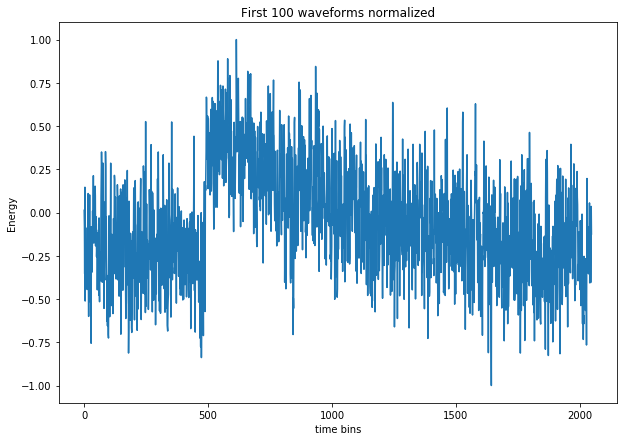

In [10]:
t = np.arange(2048)
fig, ax = plt.subplots(1, 1, figsize = (10,7))
for n in range(0,100):
    ax.plot(t, data_norm[n])
    ax.set_xlabel("time bins")
    ax.set_ylabel("Energy")
ax.title.set_text("First 100 waveforms normalized")

In [11]:
#np.random.shuffle(data)
print(np.shape(saturatedData))
print(np.shape(data))

del saturatedData
gc.collect()

(8590, 2048)
(8554, 2048)


27

In [12]:
colors = {}
colors[-1] = 'black'
colors[0] = 'r'
colors[1] = 'g'
colors[2] = 'b'
colors[3] = 'c'
colors[4] = 'm'
colors[5] = 'y'
colors[6] = 'pink'
colors[7] = 'purple'
colors[8] = 'silver'
colors[9] = 'brown'
colors[10] = 'olive'
colors[11] = 'aquamarine'
colors[12] = 'cornflowerblue'
colors[13] = 'teal'
colors[14] = 'salmon'
colors[15] = 'lime'
colors[16] = 'gold'

# Dimensionality Reduction using principal component analysis

In [13]:
u, s, vh = np.linalg.svd(data_norm, full_matrices=False)

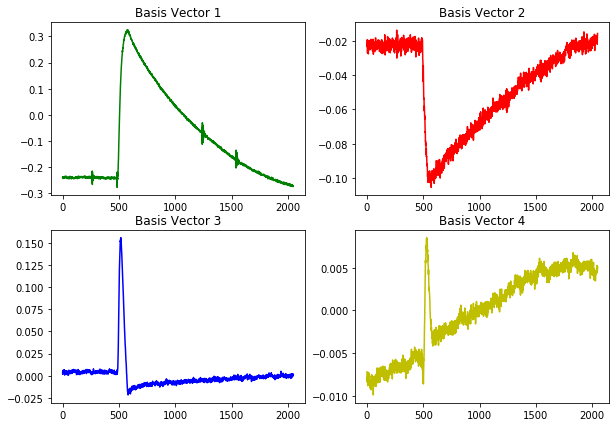

In [14]:
fig, ax = plt.subplots(2,2, figsize = (10,7))
ax[0,0].plot(u[0,0]*s[0]*vh[0], color = 'g')
ax[0,0].title.set_text("Basis Vector 1")
ax[0,1].plot(u[1,1]*s[1]*vh[1], color = 'r')
ax[0,1].title.set_text("Basis Vector 2")
ax[1,0].plot(u[2,2]*s[2]*vh[2], color = 'b')
ax[1,0].title.set_text("Basis Vector 3")
ax[1,1].plot(u[3,3]*s[3]*vh[3], color = 'y')
ax[1,1].title.set_text("Basis Vector 4")

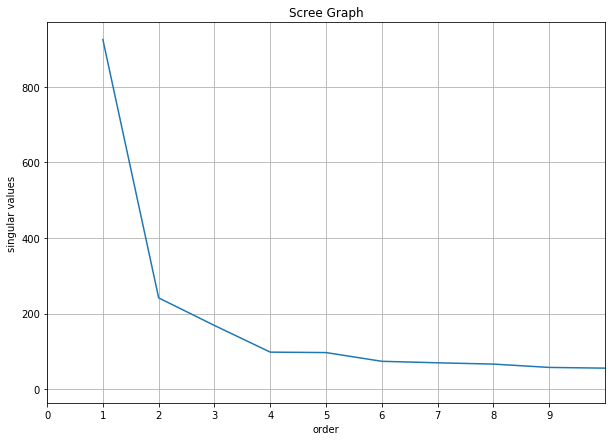

In [15]:
scree_order = np.arange(1,len(s)+1)
fig, ax = plt.subplots(1, 1, figsize = (10,7))
ax.plot(scree_order, s)
ax.title.set_text("Scree Graph")
ax.set_ylabel("singular values")
ax.set_xlabel("order")
ax.set_xlim([0,10])
ax.set_xticks(np.arange(0,10))
plt.grid()
plt.show()

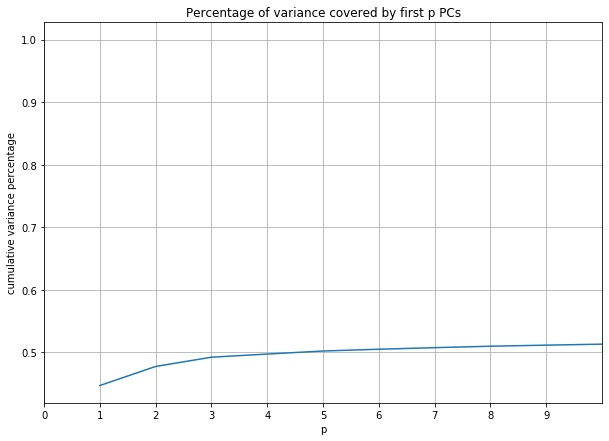

In [16]:
variance = np.zeros_like(s)
for i in range(len(s)):
    variance[i] = s[i]**2
total_variance = 0
for i in range(len(variance)):
    total_variance += variance[i]
    
pvc = np.zeros_like(variance)
for i in range(len(pvc)):
    pvc[i] = variance[i] + pvc[i-1]
for i in range(len(pvc)):
    pvc[i] = pvc[i] / total_variance
    
fig, ax = plt.subplots(1, 1, figsize = (10,7))
ax.plot(scree_order, pvc)
ax.title.set_text('Percentage of variance covered by first p PCs')
ax.set_xlabel('p')
ax.set_ylabel('cumulative variance percentage')
ax.set_xlim(0,10)
ax.set_xticks(np.arange(0,10))
plt.grid()
plt.show()

In [17]:
v = np.transpose(vh)
vD = v[:,:2]
rDataD = data_norm@vD

In [18]:
del u, s, vh, vD
gc.collect()

13907

# Start HDBSCAN

In [19]:
doubleDistances = distance_matrix(rDataD, rDataD)
#double counts distances. Get upper triangle matrix then manipulate it 
temp = np.triu(doubleDistances)
distances = np.asarray(temp).reshape(-1)
distances = np.sort(distances)
distances = np.flip(distances)
#remove 0s where repeats used to be
nonzeros = int((len(doubleDistances)*len(doubleDistances) - 1)/2)
distances = distances[0:nonzeros]
order = np.arange

gc.collect()

20

In [52]:
hdb = hdbscan.HDBSCAN(min_cluster_size=15, gen_min_span_tree=True).fit(rDataD)
labels = hdb.labels_

#Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

counts = np.zeros(n_clusters)
for i in range(n_clusters):
    for label in labels:
        if label == i:
            counts[i] += 1
            
percentage_counts = counts/len(data)
for i in range(len(percentage_counts)):
    percentage_counts[i] = round(percentage_counts[i], 3)

In [53]:
print ("Number of clusters: " + str(n_clusters))
print ("Number of noise points: " + str(n_noise))
print ("% of data included in clustering: " + str (1 - n_noise/len(labels)))

Number of clusters: 2
Number of noise points: 171
% of data included in clustering: 0.9800093523497779


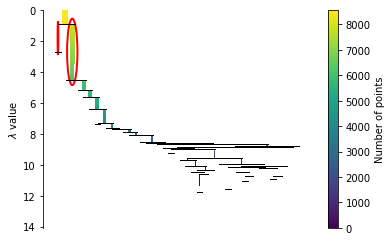

In [54]:
hdb.condensed_tree_.plot(select_clusters=True)

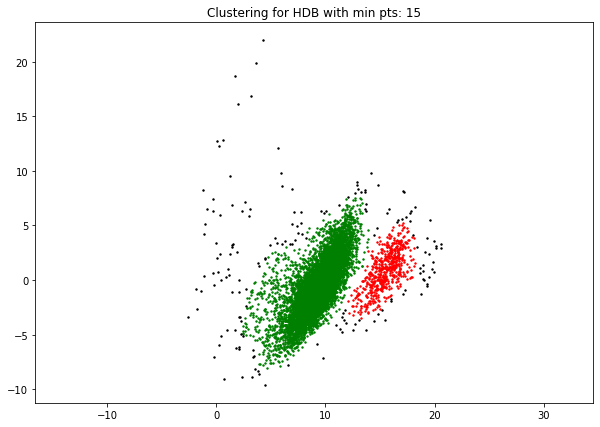

In [55]:
cvec = [colors[label] for label in labels]
x = rDataD[:,0]
y = rDataD[:,1]
fig, ax = plt.subplots(figsize = (10,7))
for i in range(len(data)): #NOTE: not nessecaryily all data being plotted
    ax.scatter(x[i],y[i], c = cvec[i], s=2)
ax.title.set_text('Clustering for HDB with min pts: ' + str(hdb.min_cluster_size))
#ax.set_xlim(-75, 20, auto=False)
#ax.set_ylim(-40, 40, auto=False)
plt.axis("equal")
plt.show()

In [24]:
avgSin = np.arange(2048)
avgDou = np.arange(2048)
avgTri = np.arange(2048)
numSin = 0
numDou = 0
numTri = 0
avgSin = avgSin.astype(float)
avgDou = avgSin.astype(float)
avgTri = avgSin.astype(float)

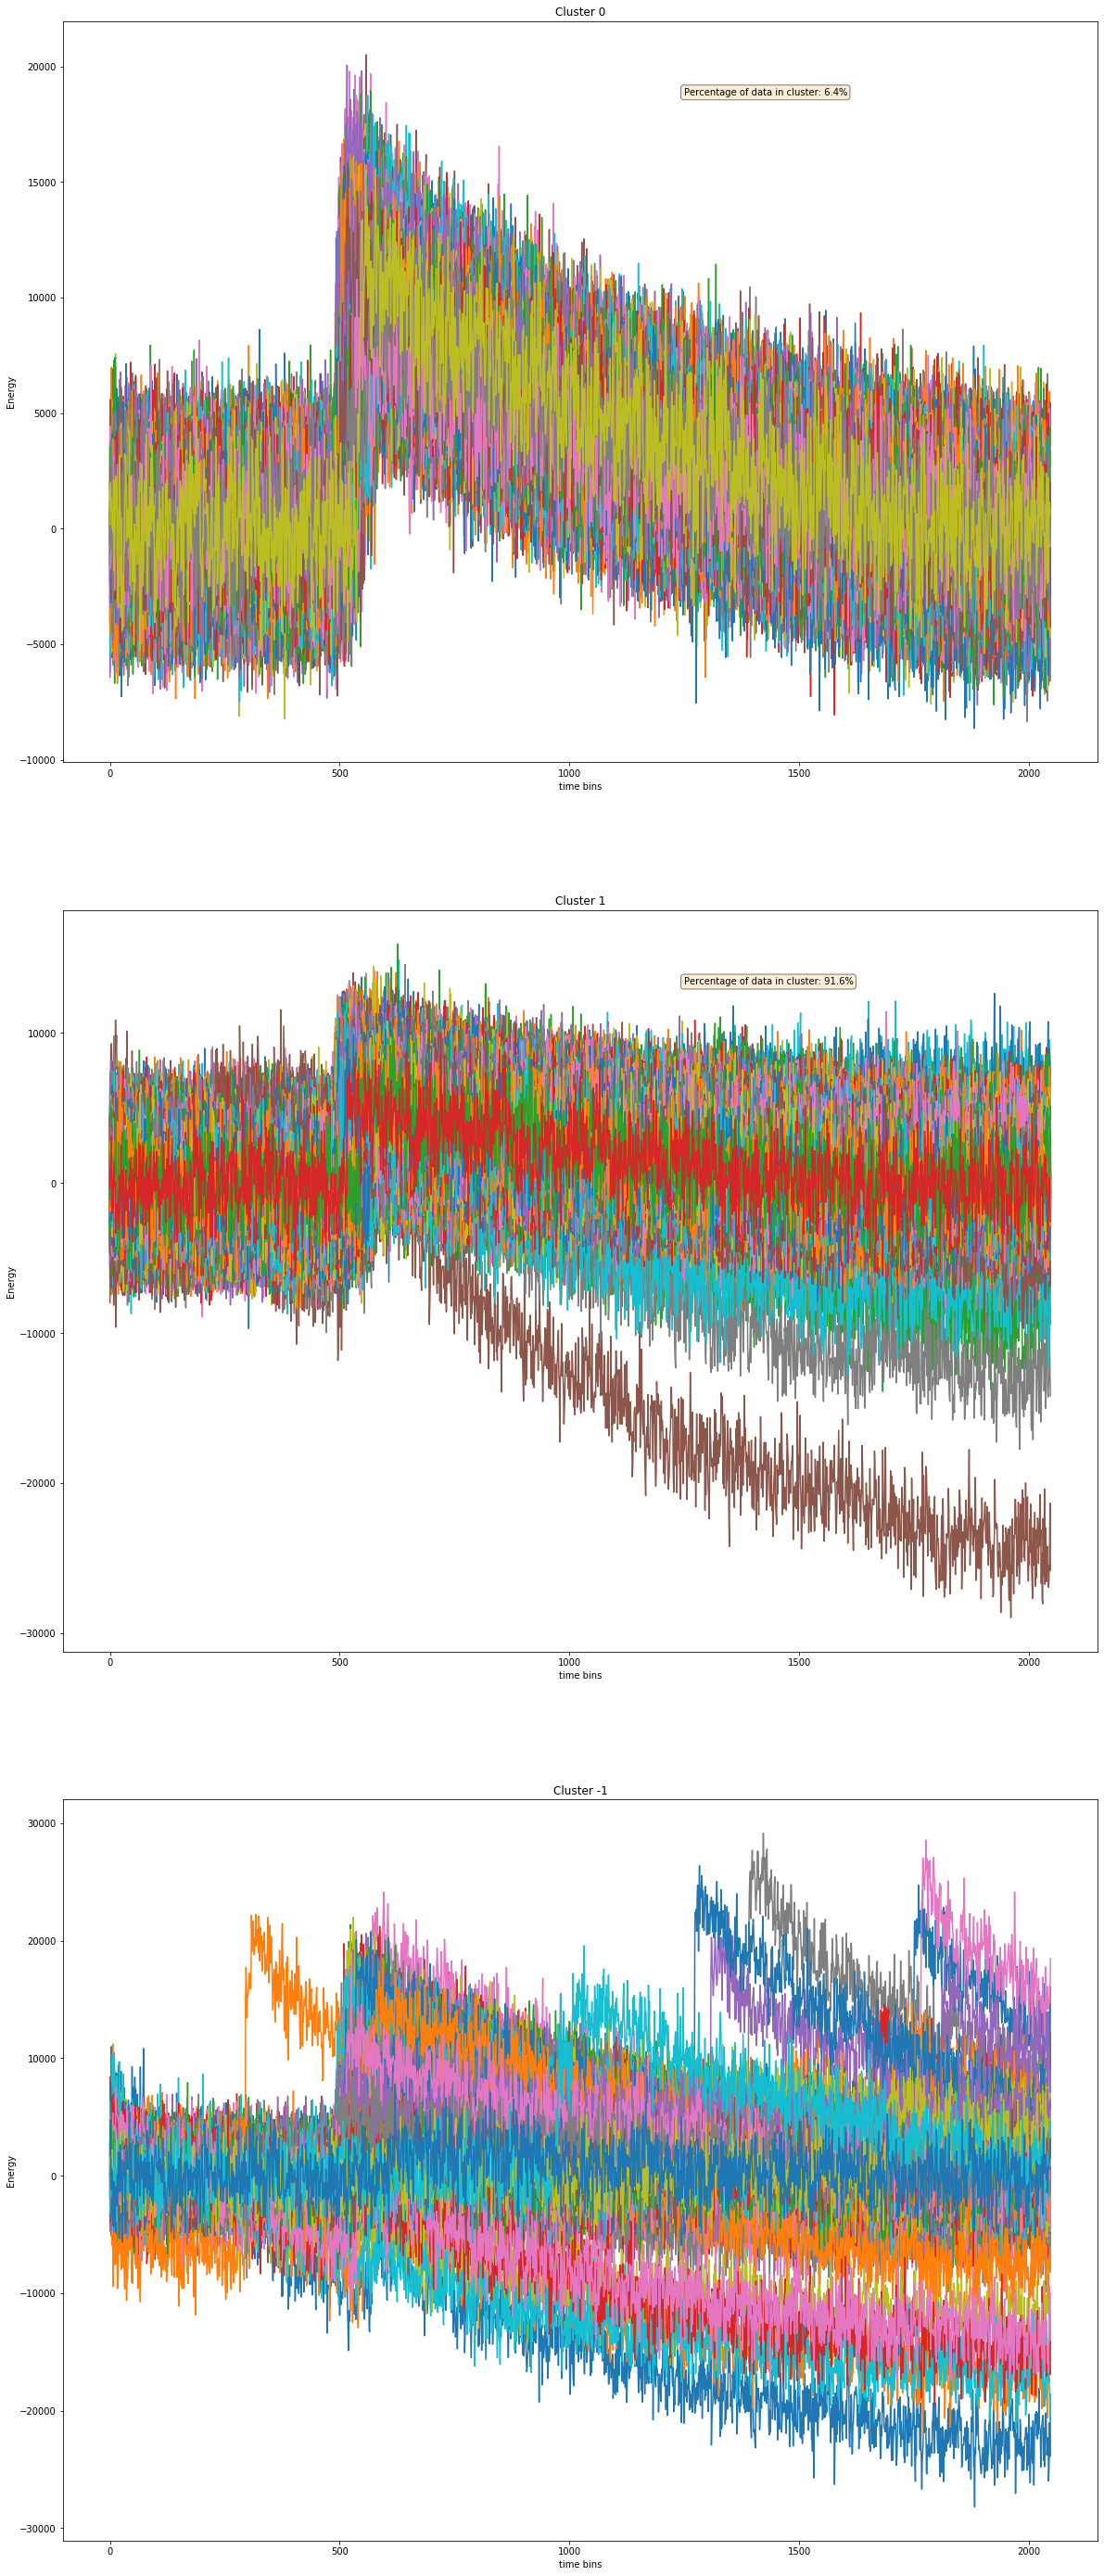

In [25]:
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
fig, ax = plt.subplots(n_clusters+1, figsize = (20,50))
t = np.arange(2048)
for n in range(len(data)):
    for i in range(-1, n_clusters):
        if i == labels[n]:
            #collecting averages
            if i == 1:
                avgSin += data[n]
                numSin += 1
            if i == 2:
                avgDou += data[n]
                numDou += 1
            if i == 0:
                avgTri += data[n]
                numTri += 1
            ax[i].plot(t, data[n])
            ax[i].title.set_text("Cluster " + str(i))
            ax[i].set_xlabel("time bins")
            ax[i].set_ylabel("Energy")
for i in range(n_clusters):
        text_x = ax[i].get_xlim()[1] - 0.4*(ax[i].get_xlim()[1] - ax[i].get_xlim()[0])
        text_y = ax[i].get_ylim()[1] - 0.1*(ax[i].get_ylim()[1] - ax[i].get_ylim()[0])
        ax[i].text(text_x, text_y, "Percentage of data in cluster: " + str(round(100*percentage_counts[i], 3)) + "%", bbox = props)
plt.show()

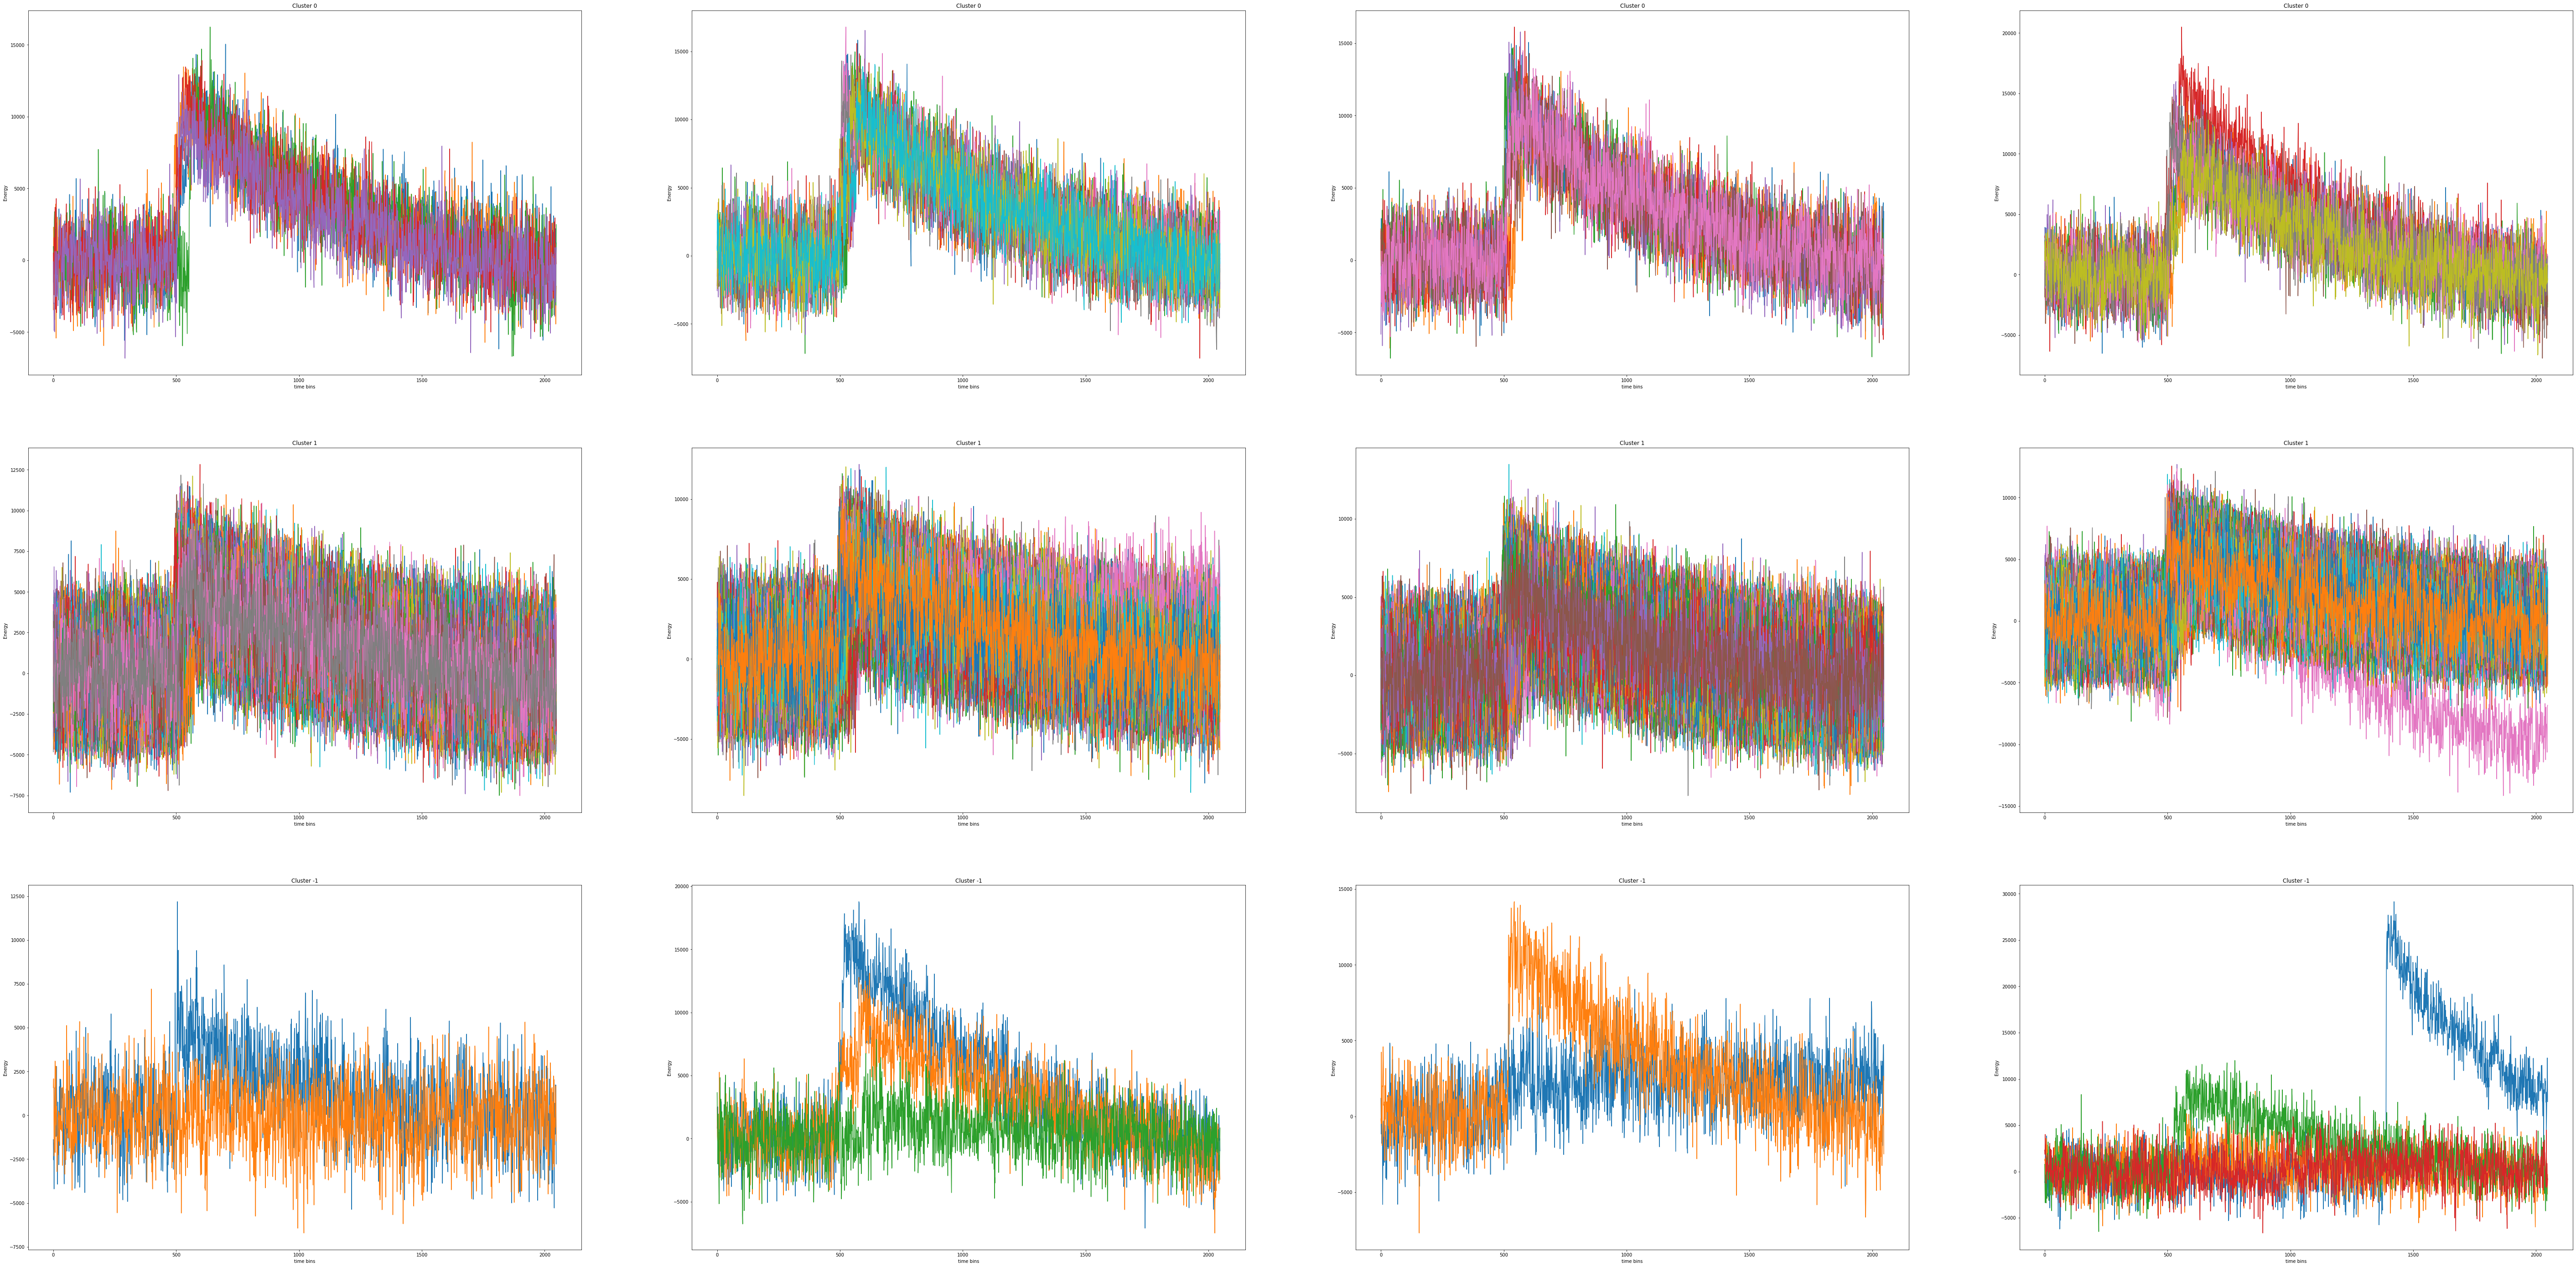

In [26]:
#Plot each group in 4 plots
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
fig, ax = plt.subplots(n_clusters+1, 4, figsize = (100,50))
t = np.arange(2048)
for j in range(0, 4):
    numPer = int(500 / 4) #NOTE: Not all data is being shown. 500 per column
    for n in range(j*numPer, (j+1)*numPer):
        for i in range(-1, n_clusters):
            if i == labels[n]:
                ax[i][j].plot(t, data[n])
                ax[i][j].title.set_text("Cluster " + str(i))
                ax[i][j].set_xlabel("time bins")
                ax[i][j].set_ylabel("Energy")
plt.show()

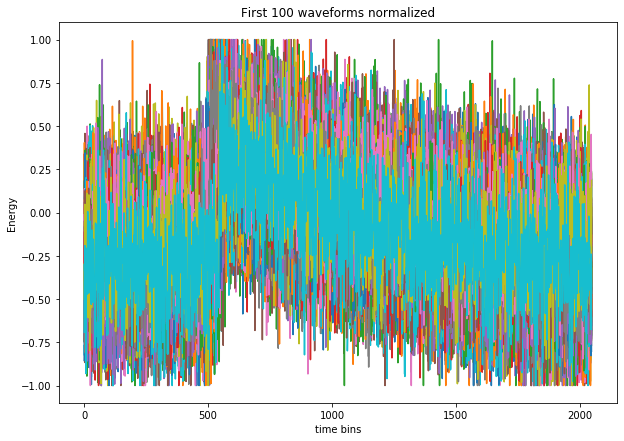

In [27]:
fig, ax = plt.subplots(1, 1, figsize = (10,7))
for n in range(100):
    ax.plot(t, data_norm[n])
    ax.set_xlabel("time bins")
    ax.set_ylabel("Energy")
ax.title.set_text("First 100 waveforms normalized")

# Averages and analysis of clusters

/Users/elicarter/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/elicarter/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


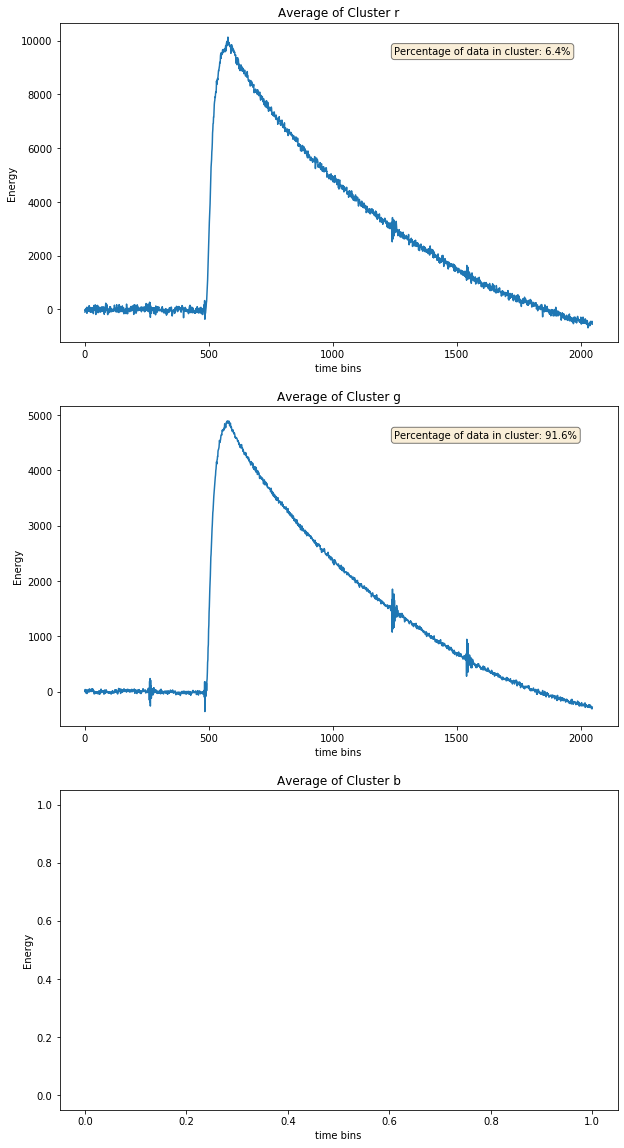

In [28]:
for i in range(2048):
    avgSin[i] = avgSin[i]/numSin
    avgDou[i] = avgDou[i]/numDou
    avgTri[i] = avgTri[i]/numTri
avgs = np.vstack((avgTri, avgSin, avgDou))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
fig, ax = plt.subplots(len(avgs), figsize = (10,20))    
for i in range(len(avgs)):
    ax[i].plot(t, avgs[i])
    ax[i].title.set_text("Average of Cluster " + str(colors[i]))
    ax[i].set_xlabel("time bins")
    ax[i].set_ylabel("Energy")
for i in range(n_clusters):
        text_x = ax[i].get_xlim()[1] - 0.4*(ax[i].get_xlim()[1] - ax[i].get_xlim()[0])
        text_y = ax[i].get_ylim()[1] - 0.1*(ax[i].get_ylim()[1] - ax[i].get_ylim()[0])
        ax[i].text(text_x, text_y, "Percentage of data in cluster: " + str(round(100*percentage_counts[i], 3)) + "%", bbox = props)
plt.show()

In [29]:
#sum over ratio differenece when comparing each waveform to average
agg_ratios = np.arange(len(data))
for n in range(len(data)):
    if labels[n] == 1:
        for time in range(2048):
            agg_ratios[n] += data[n][time]/avgs[1][time]
    if labels[n] == 2:
        for time in range(2048):
            agg_ratios[n] += data[n][time]/avgs[2][time]
    if labels[n] == 0:
        for time in range(2048):
            agg_ratios[n] += data[n][time]/avgs[0][time]
#normalize
agg_ratios = agg_ratios/2048